# Verify Jupyter Notebooks

Este notebook testa uma lista de notebooks usados no curso e verifica se sua execução ocorre sem problemas

In [10]:
import os
import time
from IPython.utils.io import CapturedIO
from IPython.display import display
import nbformat
import re

In [11]:
os.makedirs('../tmp',exist_ok=True)

## Função que extrai a lista de todos os notebooks do arquivo de index

In [12]:
def nb_index2list(nb_index):
    nb = nbformat.read(nb_index, as_version=4)
    nn = [ncell['source']  for ncell in nb['cells'] if ncell['cell_type']=='markdown']
    nb_list = [re.findall('\((.+?).ipynb\)',nn_each) for nn_each in nn]
    nb_list = sum(nb_list, [])
    return nb_list

In [13]:
nbl = nb_index2list('../PyTorch/0_index.ipynb')

In [14]:
nblist = ['ExercicioIntrodutorio',
 'Matrizes_Arrays_Tensores', # demora 14 segundos
 'MovingMean_Momentum',
 #'Cats_and_dogs',          # problema no predict
 #'RegressaoLinearDemo',    # esse zera o output do script de testes
 'LinearRegressionIrisNumPy',
 'LinearRegressionIris-Tensor',
 'LinearRegressionIris-Tensor-Solucao',
 'PyTorch_Variaveis_Gradientes',
 'LinearRegressionIrisPyTorch',
 'LinearRegressionIrisOptimizer',
         ]

In [15]:
nblist1 = [
 'LogisticRegressionIris',  # demora 16 segundos
 'LogisticRegressionMNIST',
 'datasets-e-dataloaders',
 'LogisticRegressionMNIST-SGD',
 'Activations_pytorch',
 'Iris-dataset-2-ou-mais-camadas-fronteira-dinamica', # demora 12 segundos
 'underfitting-overfitting-regularization',
 'RegressaoLinearOtimizadores',  # demora 204 segundos
 'optimizer',
 'MNIST_neuralnet',
]

In [16]:
nblist2 = [
 'boston_housing',
 'Predict_Boston_House_Prices',  # demora 13 seg
 'batch_norm_basics_pytorch',
 'credit_card_fraud_detection_kaggle_pytorch',  # demora 64 seg
 'AnaliseSentimento_IMDB_bagwords', # demora 51 s
 'autoencoder', # demora 26s
 'model_selection_mnist', # demora 50s
 'Explorando-Convolucao-no-PyTorch',
 'Introducao-CNN-PyTorch',
 'cifar10-CNN-features', # demora 26s
]

In [17]:
nblist3 = [
 'Models_ImageNet',  # demora se tiver carregar modelo. Está com ERRO nos modelos da resnet
 'lenet-mnist',  # OK 0.9s
 'data_augmentation_catsdogs', # 4s OK
 'transfer_learning_catsdogs', # está com mesmo ERRO da ImageNet - alguma coisa deve ter mudado para 0.3
 'facial_features',  # está com o mesmo ERRO de transfer learning
 'fully_convolutional', # OK 1.4s
 'segmentation_carvana', # OK 
 'svhn_dnt', # 37s, demorando predict. OK, mas pode ser melhorado
 'vae_mnist', #  está faltando copiar as imagens salvas durante treinamento para o /data
 'vae_celeba', # o mesmo que vae_mnist, porém o predict demora mais tempo
]

In [23]:
nblist4 = [
 'dcgan_mnist',  # OK 0.8s
 'transposed_convolution', # OK
 'movieLens_dataset',   # OK 3.6s
 'embedding-basics-pytorch', # OK 0.1s
 'sistema_recomendacao', # OK 1.8s
 'livros_dataset', # dá erro aqui, mas no notebook está OK
 'livros_preprocessing', # OK 1.5s
 'livros_classif', # 14s
 'livros_classif_w2v', # OK 0.1
 'analise_sentimento_imdb', # OK 12s predict pode demorar na CPU
]

In [25]:
log_nb

[{'exectime': 0.5103154182434082, 'nbname': 'dcgan_mnist'},
 {'exectime': 0.016300439834594727, 'nbname': 'transposed_convolution'},
 {'exectime': 0.9393413066864014, 'nbname': 'movieLens_dataset'},
 {'exectime': 0.01570439338684082, 'nbname': 'embedding-basics-pytorch'},
 {'exectime': 1.821533441543579, 'nbname': 'sistema_recomendacao'},
 {'exectime': 2.4099409580230713, 'nbname': 'livros_dataset'},
 {'exectime': 0.32601380348205566, 'nbname': 'livros_preprocessing'},
 {'exectime': 2.4687178134918213, 'nbname': 'livros_classif'},
 {'exectime': 0.011385917663574219, 'nbname': 'livros_classif_w2v'},
 {'exectime': 7.863037824630737, 'nbname': 'analise_sentimento_imdb'}]

In [21]:
nblist5 = [
 'simpleRNN_numerical', # OK
 'simpleRNN_MNIST', # OK 08s
 'analise_sentimento_lstm_imdb', # OK 470s
 'seq2seq-translation']

[NbConvertApp] Converting notebook ../PyTorch/dcgan_mnist.ipynb to script
[NbConvertApp] Writing 8391 bytes to ../tmp/dcgan_mnist.py
EXEC start: dcgan_mnist
/home/jupyterhub/lotufo/rnap/PyTorch
GPU available: True
Número de amostras no dataset (treino): 60000
EXEC end : 0.5103154182434082
[NbConvertApp] Converting notebook ../PyTorch/transposed_convolution.ipynb to script
[NbConvertApp] Writing 2164 bytes to ../tmp/transposed_convolution.py
EXEC start: transposed_convolution
/home/jupyterhub/lotufo/rnap/PyTorch
a:
(0 ,0 ,.,.) = 
  3  2  1  2
  1  3  0  1
  1  1  2  1
[torch.FloatTensor of size 1x1x3x4]


b:
(0 ,0 ,.,.) = 
  1  1
  1  1
[torch.FloatTensor of size 1x1x2x2]


c = a ✻ b:   (torch.nn.Conv2d)
(0 ,0 ,.,.) = 
  9  6  4
  6  6  4
[torch.FloatTensor of size 1x1x2x3]


d = c ✻ b:   (torch.nn.ConvTranspose2d)
(0 ,0 ,.,.) = 
   9  15  10   4
  15  27  20   8
   6  12  10   4
[torch.FloatTensor of size 1x1x3x4]


1x1 padded c:
(0 ,0 ,.,.) = 
  0  0  0  0  0
  0  9  6  4  0
  0  6  6

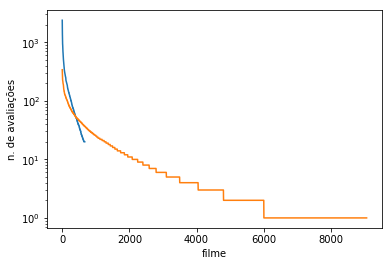

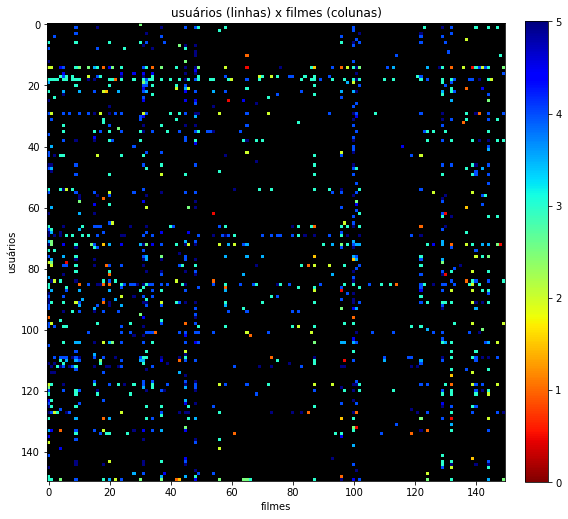

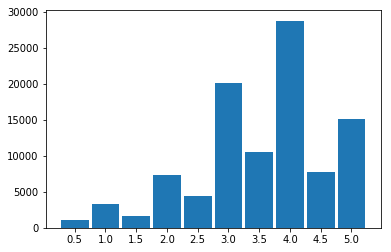

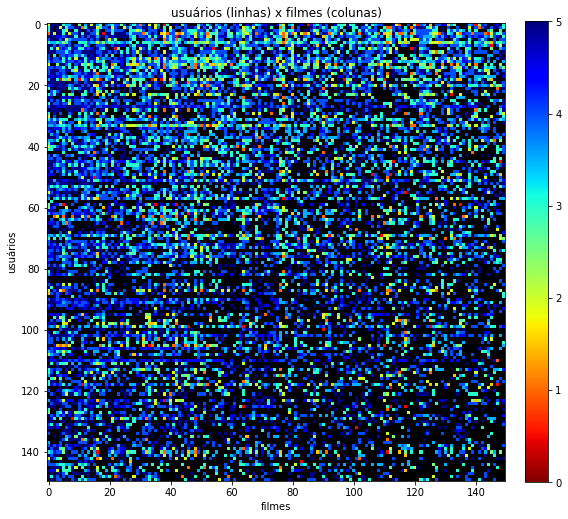

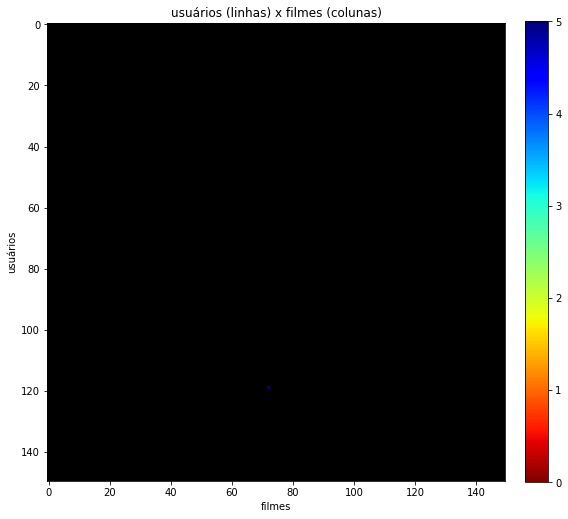

pop_users: [546 563 623  14  72 451 467 379 310  29]
pop_movies: [ 321  266  284  525  232  427 2062    0  472  522]
Forrest Gump (1994)
Pulp Fiction (1994)
Shawshank Redemption, The (1994)
Silence of the Lambs, The (1991)
Star Wars: Episode IV - A New Hope (1977)
Jurassic Park (1993)
Matrix, The (1999)
Toy Story (1995)
Schindler's List (1993)
Terminator 2: Judgment Day (1991)
EXEC end : 0.9393413066864014
[NbConvertApp] Converting notebook ../PyTorch/embedding-basics-pytorch.ipynb to script
[NbConvertApp] Writing 5451 bytes to ../tmp/embedding-basics-pytorch.py
EXEC start: embedding-basics-pytorch
/home/jupyterhub/lotufo/rnap/PyTorch
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0

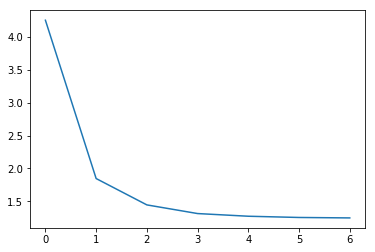

Best loss: 1.2481659148562338


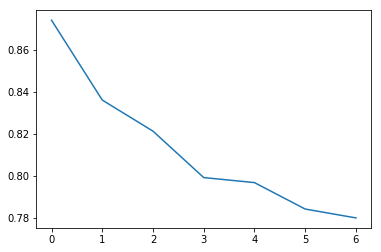

Best loss: 0.7800395729594214
(671, 9066)


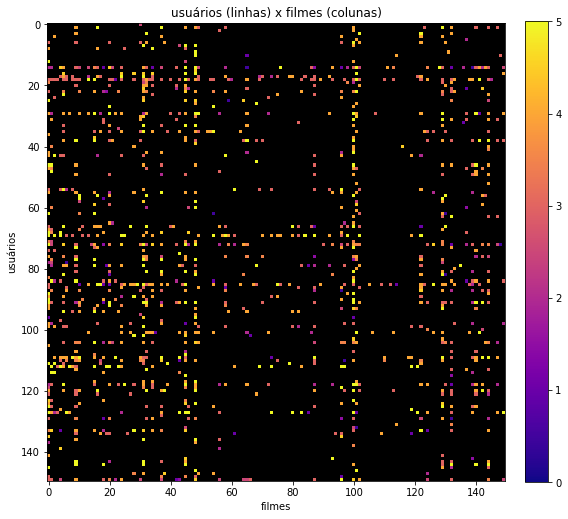

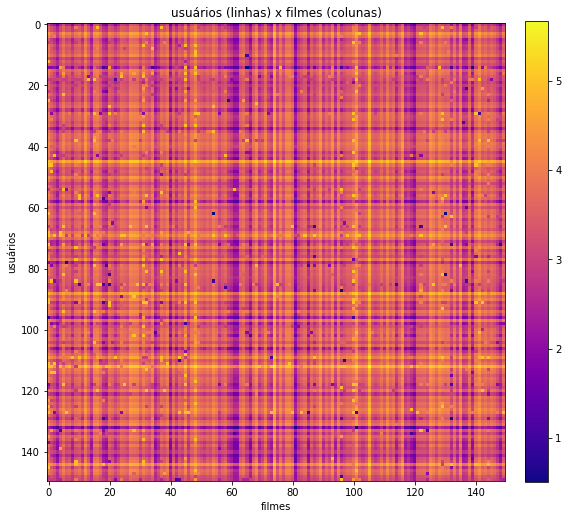

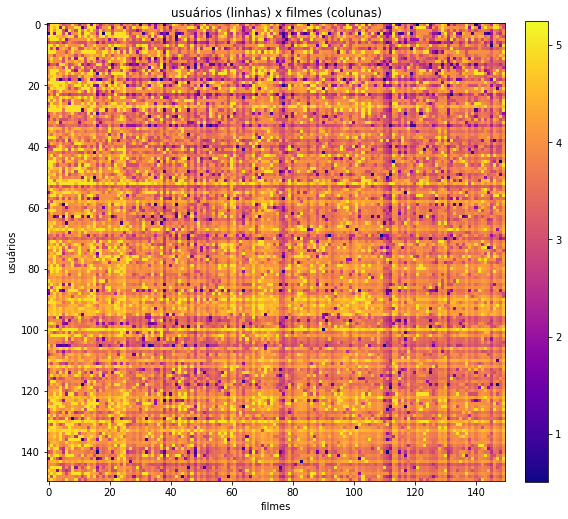

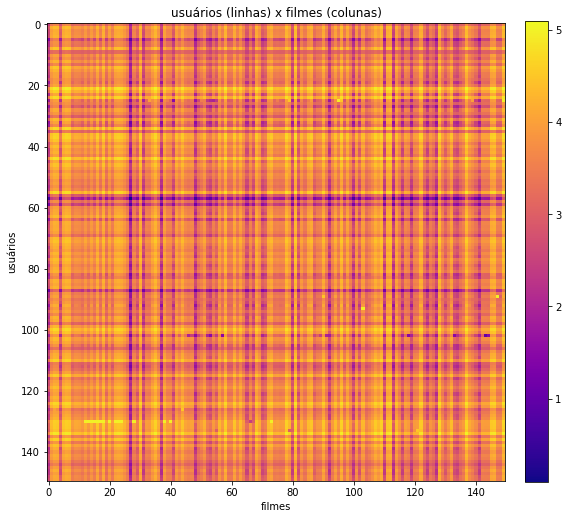

0.065104425 Governess, The (1998)
0.059462596 Mulan (1998)
0.059349112 Wings of the Dove, The (1997)
0.056690827 Patch Adams (1998)
0.056108616 Back to the Future Part II (1989)
0.052051328 Star Trek II: The Wrath of Khan (1982)
0.051652275 Saboteur (1942)
0.051590748 Godzilla (Gojira) (1954)
0.051515114 Police Academy 4: Citizens on Patrol (1987)
0.05138214 Glen or Glenda (1953)
0.05101033 Antz (1998)
0.050475962 Friday the 13th Part VII: The New Blood (1988)
0.04934322 Man for All Seasons, A (1966)
0.049229223 E.T. the Extra-Terrestrial (1982)
0.049054477 187 (One Eight Seven) (1997)
-0.04977064 This Is Spinal Tap (1984)
-0.050183583 Spirits of the Dead (1968)
-0.05042435 Species (1995)
-0.050475504 Kicking and Screaming (1995)
-0.050988954 Glory (1989)
-0.051094543 Bio-Dome (1996)
-0.051850002 Elephant Man, The (1980)
-0.051913876 Phantom, The (1996)
-0.052410487 Cape Fear (1962)
-0.05355458 La Cérémonie (1995)
-0.05419518 Naked (1993)
-0.05432283 Grumpier Old Men (1995)
-0.05453019

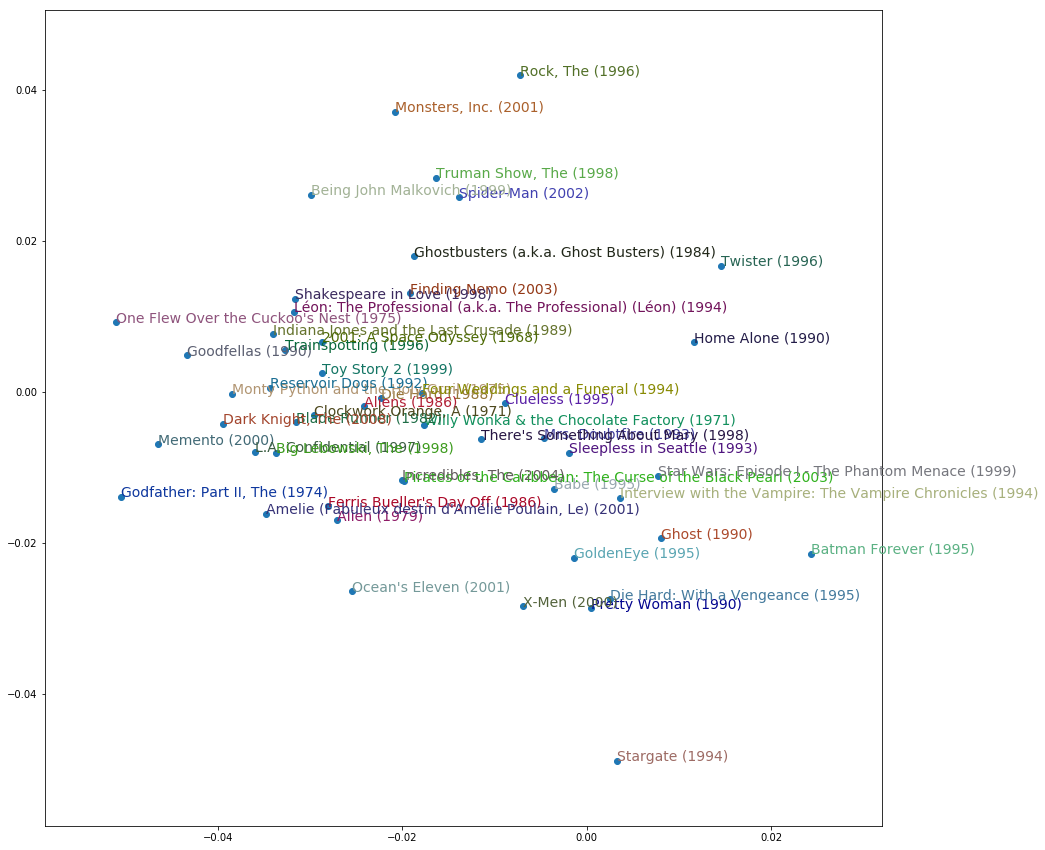

EXEC end : 1.821533441543579
[NbConvertApp] Converting notebook ../PyTorch/livros_dataset.ipynb to script
[NbConvertApp] Writing 7328 bytes to ../tmp/livros_dataset.py
EXEC start: livros_dataset
/home/jupyterhub/lotufo/rnap/PyTorch
GPU available: True
torch 0.3.0.post4
Python 3.6.1 (default, Sep  7 2017, 16:36:03) 
[GCC 6.3.0 20170406]
1030735  Jorge_Amado        Dona_flor_seus_dois_maridos
 828417  Jorge_Amado        Gabriela
1001226  Jorge_Amado        Tereza_Batista_Cansada_de_Guerra
 427711  Jorge_Amado        Capitães_de_Areia
 411043  Machado_de_Assis   Esaú_e_Jacó
 336677  Machado_de_Assis   Iaiá_Garcia
 372459  Machado_de_Assis   Dom_Casmurro
 280683  Machado_de_Assis   Memorial_de_Aires
 443778  Machado_de_Assis   Quincas_Borba
 337533  Machado_de_Assis   Helena
 352965  Machado_de_Assis   Memórias_Póstumas_de_Brás_Cubas
 749265  Érico_Veríssimo    O_Tempo_e_o_Vento_-_O_Continente
 294049  Érico_Veríssimo    Clarissa
 890215  Érico_Veríssimo    Incidente_em_Antares
 6993

[['marilda' 'dinorá' 'teodoro' 'pelancchi' 'gisa' 'mirandão' 'rozilda' 'vadinho']
 ['tuísca' 'tonico' 'ribeirinho' 'malvina' 'amâncio' 'fulgêncio' 'gabriela' 'nacib']
 ['vavá' 'januário' 'almério' '—' 'dóris' 'brígida' 'justiniano' 'tereza']
 ['trapiche' 'bedel' 'ester' 'barandão' 'almiro' 'dora' '–' 'pirulito']
 ['coupé' 'gêmeos' 'excia' 'custódio' 'nóbrega' 'natividade' 'flora' 'cláudia']
 ['procópio' 'valéria' 'jorge' 'garcia' 'madrasta' 'enteada' 'iaiá' 'estela']
 ['manduca' 'protonotário' 'bentinho' 'sancha' 'pádua' 'justina' 'escobar' 'capitu']
 ['carmo' 'libertos' 'prainha' 'noronha' 'cesária' 'aguiar' 'fidélia' 'tristão']
 ['camacho' 'teófilo' 'tonica' 'borba' 'sofia' 'fernanda' 'benedita' 'rubião']
 ['ângela' 'eugênia' 'tomásia' 'melchior' 'helena' 'camargo' 'estácio' 'úrsula']
 ['damasceno' 'eusébia' 'cubas' 'borba' 'sabina' 'cotrim' 'marcela' 'virgília']
 ['maneco' 'amaral' 'lara' 'vosmecê' 'bibiana' '—' 'alonzo' 'rodrigo']
 ['gamaliel' 'dudu' 'eufrasina' 'tatá' 'belmira' 't

TypeError: 'int' object is not callable

EXEC end : 2.4099409580230713
[NbConvertApp] Converting notebook ../PyTorch/livros_preprocessing.ipynb to script
[NbConvertApp] Writing 7125 bytes to ../tmp/livros_preprocessing.py
EXEC start: livros_preprocessing
/home/jupyterhub/lotufo/rnap/PyTorch
total 20
drwsrwsr-x 2 lotufo jh_users 4096 Jun 11  2017 Érico Veríssimo
drwsrwsr-x 2 lotufo jh_users 4096 Jun  4  2017 Fernando Sabino
drwsrwsr-x 2 lotufo jh_users 4096 Jun  4  2017 Guimarães Rosa
drwsrwsr-x 2 lotufo jh_users 4096 Jun  4  2017 Jorge Amado
drwsrwsr-x 2 lotufo jh_users 4096 Oct 25 11:03 Machado de Assis
427711
828417
1030735
1001226
353713
373300
445193
411870
281167
336677
337533
511681
328288
180313
87788
749265
699390
890215
294049
EXEC end : 0.32601380348205566
[NbConvertApp] Converting notebook ../PyTorch/livros_classif.ipynb to script
[NbConvertApp] Writing 5132 bytes to ../tmp/livros_classif.py
EXEC start: livros_classif
/home/jupyterhub/lotufo/rnap/PyTorch
GPU available: True
Vocabulary: 20000 words
Training dataset

TypeError: 'int' object is not callable

EXEC end : 0.011385917663574219
[NbConvertApp] Converting notebook ../PyTorch/analise_sentimento_imdb.ipynb to script
[NbConvertApp] Writing 12469 bytes to ../tmp/analise_sentimento_imdb.py
EXEC start: analise_sentimento_imdb
/home/jupyterhub/lotufo/rnap/PyTorch
GPU available: True
Train word index limits: 1 88584
Test word index limits: 1 88581

Train sequence length limits: 10 2493
Test sequence length limits: 6 2314

Most frequent words: ['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']
Train word index limits: 1 9999
Test word index limits: 1 9999

Train sequence length limits: 9 2194
Test sequence length limits: 6 2198
Train word index limits: 0 9999
Test word index limits: 0 9999

Train sequence length limits: 500 500
Test sequence length limits: 500 500
Training disable, loading trained model
evaluate: 12/12 ok
Model training set accuracy after training: 0.95252

evaluate: 12/12 ok
Model validation set accuracy after training: 0.88604
Training disable, loading trained

In [24]:
#%%capture res
log_nb = []
for nb in nblist4[:]:
    !jupyter nbconvert --output-dir='../tmp' --to 'script' ../PyTorch/{nb}
    nbd = dict()
    nbd['nbname'] = nb
    print('EXEC start:',nb)
    t_init = time.time()
    %cd ../PyTorch/
    %run ../tmp/{nb}
    dt = time.time() - t_init
    nbd['exectime'] = dt
    log_nb.append(nbd)
    print('EXEC end :', dt)
    #for r in results:
    #    if 'SyntaxError' in r:
    #        print(nb,r)

In [ ]:
log_nb

In [ ]:
#print(res.stderr)

In [ ]:
#print(res.stdout)

In [ ]:
#for r in res.outputs:
#    display(r)